## Principal Component Analysis

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centred (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


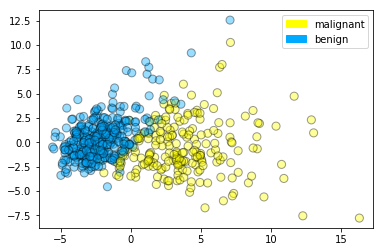

Text(0.5,1,'Breast Cancer Dataset PCA (n_components = 2)')

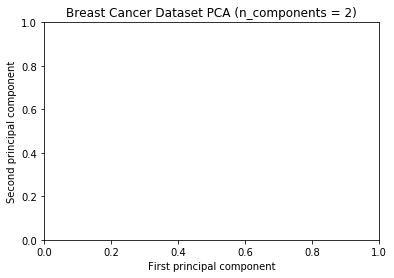

In [2]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')

## Multidimensional Scaling (manifold algorithm) MDS

In [3]:
# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

ValueError: c of shape (59, 1) not acceptable as a color sequence for x with size 59, y with size 59

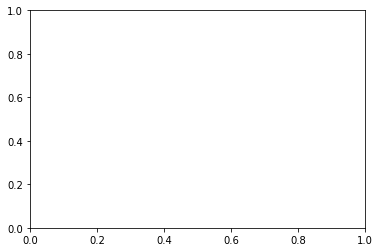

In [4]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# normalise
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)


plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS')

## t-SNE algorithm

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruit sample dataset t-SNE')

# K means Clustering

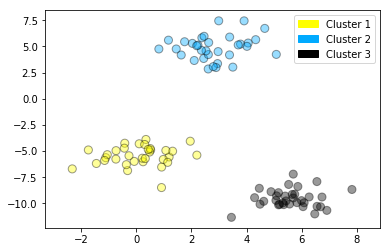

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

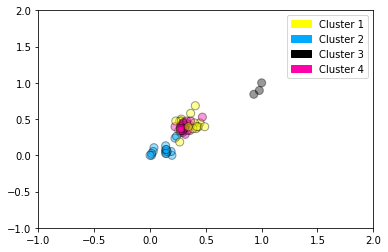

In [6]:
from sklearn.preprocessing import MinMaxScaler

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_,
                     ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Agglomerative Clustering

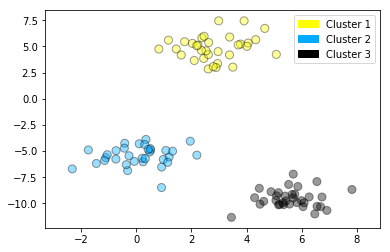

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

X, y = make_blobs(random_state = 10)
plot_labelled_scatter(X, cls_assignment, 
                     ['Cluster 1', 'Cluster 2', 'Cluster 3'])

### Dendrogram

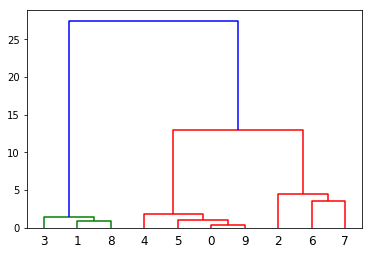

In [9]:
from scipy.cluster.hierarchy import ward, dendrogram

X, y = make_blobs(random_state = 10, n_samples = 10)

plt.figure()
dendrogram(ward(X))
plt.show()

Cluster membership values
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


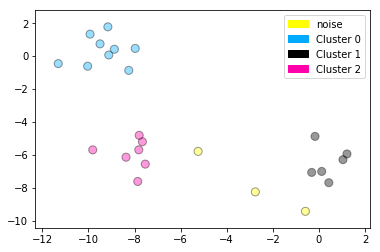

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values\n{}".format(cls))

plot_labelled_scatter(X, cls + 1,
                     ['noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])